In [18]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns # importer Seaborn sous le nom de sns

from matplotlib.ticker import PercentFormatter
from colorama import Fore, Back, Style

warnings.filterwarnings('ignore')

In [2]:
path = os.getcwd()
print(f"Le répertoire courant est : {path} \n")

Le répertoire courant est : /home/mikaleff 



In [12]:
print("\n")  
print (f"{Fore.YELLOW}------------------------------ Récupération des fichiers ------------------------------{Style.RESET_ALL}\n")

fns=glob.glob('**/fao_2013/*.csv', recursive=True)
nameModificateur=['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']

df_bigTab = pd.DataFrame(columns=['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'])

#--------------- Construction du big Tableau ----------------------------------
for fn in fns:
    fns = fn[29:-4]
    df=pd.read_csv(fn, names=nameModificateur, header=0)
    print("\n")  
    print(f"{Fore.YELLOW}---------------------- Récupération du fichier {fns} --------------------{Style.RESET_ALL}\n")
    print(f"- {fn:50s} ({df.shape[0]:6d}, {df.shape[1]:2d}) - {Fore.BLACK}{Back.CYAN}{fns}{Style.RESET_ALL} \n")
    print(f"{Fore.YELLOW}-------------------------------------------------------------------------{Style.RESET_ALL}\n")
    print("\n")
    print(f"{Fore.YELLOW}------------------------ Analyse du fichier {fns} ------------------------{Style.RESET_ALL}\n")
    print(f"{df.describe()}")
    print("\n")
    print(f"{Fore.YELLOW}--------------------------------------------------------------------------{Style.RESET_ALL}\n")

    df_bigTab=df_bigTab.append(df)



------------------------------ Récupération des fichiers ------------------------------



---------------------- Récupération du fichier sous_alimentation --------------------

- Bureau/fao_2013/FAOSTAT_2013_sous_alimentation.csv (   204, 14) - sous_alimentation 

-------------------------------------------------------------------------



------------------------ Analyse du fichier sous_alimentation ------------------------

        Code Pays  Code Élément  Code Produit  Code Année      Valeur
count  204.000000         204.0         204.0       204.0   97.000000
mean   129.264706        6132.0       21001.0  20122014.0    9.041237
std     76.765836           0.0           0.0         0.0   28.889361
min      1.000000        6132.0       21001.0  20122014.0    0.100000
25%     62.500000        6132.0       21001.0  20122014.0    0.500000
50%    127.500000        6132.0       21001.0  20122014.0    1.800000
75%    193.250000        6132.0       21001.0  20122014.0    6.100000
max    

In [66]:
df_population=df_bigTab.query('Produit == "Population"').loc[:,["Code Pays","Pays","Valeur","Année"]].sort_values(by="Valeur", ascending=False)
df_population=df_population.set_index('Code Pays')
df_population

,Pays,Valeur,Année
Code Pays,,,
351,China,1416667.0,2013
41,"China, mainland",1385567.0,2013
100,India,1252140.0,2013
231,United States of America,320051.0,2013
101,Indonesia,249866.0,2013
...,...,...,...
83,Kiribati,102.0,2013
8,Antigua and Barbuda,90.0,2013
55,Dominica,72.0,2013


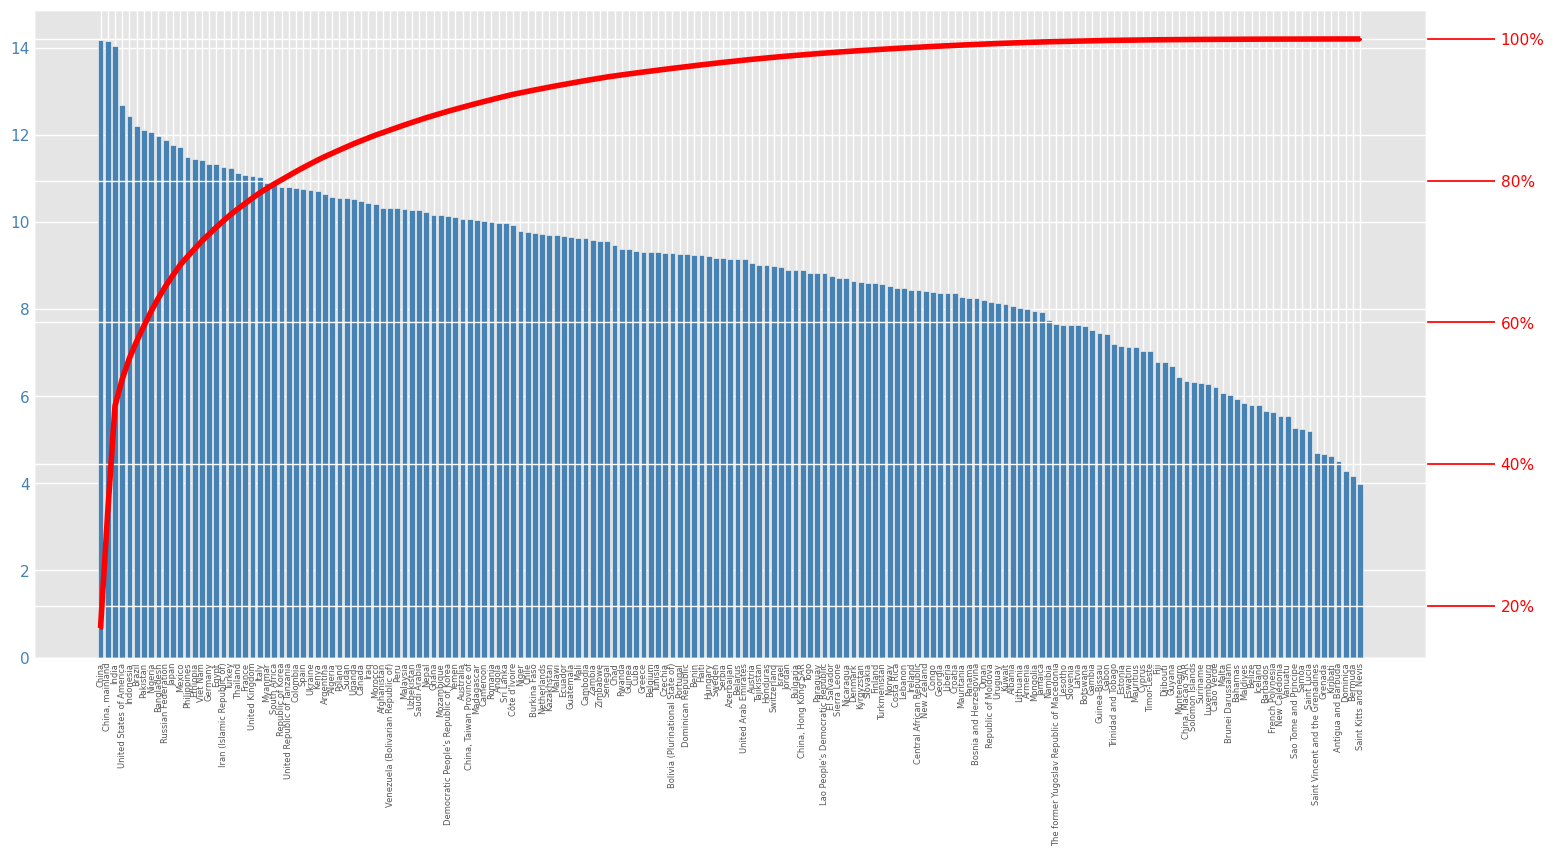

In [76]:
#add column to display cumulative percentage
df_population['cumperc'] = df_population['Valeur'].cumsum()/df_population['Valeur'].sum()*100

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_population['Pays'], np.log(df_population['Valeur']), color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df_population['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax.tick_params(axis='x', labelrotation=90, labelsize=6)
ax2.tick_params(axis='y', colors=color2, length=50)


#display Pareto chart
plt.show()

In [16]:
pop_planetaire = df_population['Valeur'].sum()
print (f"La population mondiale en 2013 est de : {pop_planetaire}")

La population mondiale en 2013 est de : 8413993.0
